In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed, shuffle, uniform
from math import ceil, sqrt
from functools import reduce

import os

# if running just for output don't halt to show plots
# plots will be saved in images folder
if __name__ == '__main__':
    no_interact = True

IMG_FOLDER = "images/"
if not os.path.exists(IMG_FOLDER):
    os.makedirs(IMG_FOLDER)

In [2]:
def sigmoid(X, Theta):
    return 1/(1+np.exp(-X@Theta))
def cost(guess, actual):
    return 1/(guess.shape[0]) * np.sum(actual.T*np.log(guess) + (1-actual).T*np.log(1-guess))
def logistic_regression(X, Y, iterations=10000, learning_rate=.01):
    
    Theta = np.array([uniform(-1,1) for _ in range(X.shape[1])]).T
    
    loss = []
    for i in range(iterations):
        # compute cost
        loss.append(cost(sigmoid(X,Theta),Y))
    
        # If the abosulte value of the change in the loss
        # on the training data is less than 2^-23
        # skip the first iteration's check
        if(i > 0 and np.abs(loss[i] - loss[i-1]) < 2**-23):
            break
    
        # Compute the gradient (partial l)/(partial theta)
        dl_dt = (learning_rate/X.shape[0]) * X.T@(Y - sigmoid(X, Theta))
    
        Theta += dl_dt
    return {"theta": Theta,
            "iterations": i,
            "loss": loss}

def get_stats(guess, actual):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(guess)):
        if(guess.item(i) > .5):
            if(test_y.item(i) == 1):
                TP += 1
            else:
                FP += 1
        else:
            if(test_y.item(i) == 0):
                TN += 1
            else:
                FN += 1

    precision = TP/(TP+FP)
    recall = TP/(TP + FN)
    f_measure = (2*precision*recall)/(precision+recall)
    accuracy = 1/(TP+FP+TN+FN)*(TP+TN)
    return {"precision": precision,
            "recall": recall,
            "f-measure": f_measure,
            "accuracy": accuracy}

# Problem 2

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X_nonstandard = np.array(iris.data[:, :2])
Y = np.array((iris.target != 0) * 1).T

# standardize the data
X_mean = np.mean(X_nonstandard, axis=0)
X_std  = np.std(X_nonstandard, axis=0)
X_nob  = (X_nonstandard - X_mean)/X_std
    
X = np.insert(X_nob, 0, 1,axis=1)

results = logistic_regression(X, Y, iterations=10000, learning_rate=.01)
Theta = results["theta"]

print("Iterations: {}".format(results["iterations"]))
for i in range(Theta.shape[0]):
    print("Theta_{}: {}\n".format(i, Theta.item(i)))
print("Final loss: {}".format(results["loss"][-1]))


Iterations: 9999
Theta_0: 2.1633089570050372

Theta_1: 3.794347908052656

Theta_2: -2.5616646633738527

Final loss: -0.04578428264540008


<Figure size 432x288 with 0 Axes>

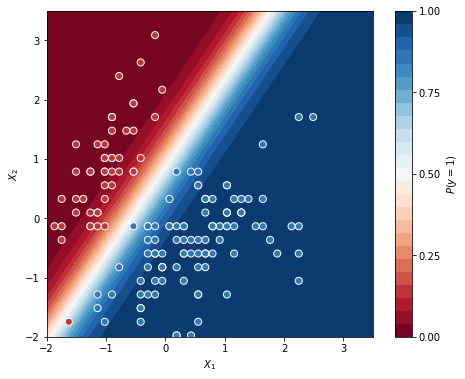

In [4]:
# Graphing section taken from https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
fig = plt.figure()
xx, yy = np.mgrid[-2:3.5:.01, -2:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
grid = np.insert(grid,0,1,axis=1)
probs = sigmoid(grid,Theta).reshape(xx.shape)


f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,1], X[:,2], c=Y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-2, 3.5), ylim=(-2, 3.5),
       xlabel="$X_1$", ylabel="$X_2$")


#plt.plot(range(len(loss)), loss)
plt.savefig(IMG_FOLDER + "Q2-Cost-vs-Iterations.png")
if(not no_interact):
    plt.show()

Theta_1: 67.26895117169423
Theta_2: -30.035073039983903
(150, 2)


<Figure size 432x288 with 0 Axes>

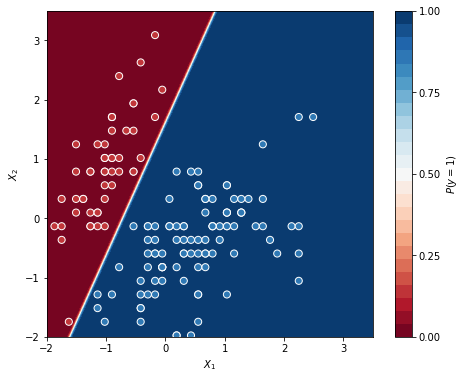

In [5]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(penalty='none', solver='lbfgs', max_iter=10000)
lgr.fit(X[:,1:],Y)
print("Theta_1: {}\nTheta_2: {}".format(lgr.coef_.item(0),lgr.coef_.item(1)))
print(X[:,1:].shape)
fig = plt.figure()
xx, yy = np.mgrid[-2:3.5:.01, -2:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lgr.predict_proba(grid)[:,1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,1], X[:,2], c=Y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-2, 3.5), ylim=(-2, 3.5),
       xlabel="$X_1$", ylabel="$X_2$")


#plt.plot(range(len(loss)), loss)
plt.savefig(IMG_FOLDER + "Q2-Cost-vs-Iterations.png")
if(not no_interact):
    plt.show()

# Problem 3

In [6]:
data = []
with open("spambase(1).data", 'r') as f:
    f.readline()
    for line in f.readlines():
        data.append(np.array(line.split(","), dtype="float32"))
        
data = np.array(data)
seed(0)
shuffle(data)

# standardize the data
X_mean = np.mean(X_nonstandard, axis=0)
X_std  = np.std(X_nonstandard, axis=0)
X_nob  = (X_nonstandard - X_mean)/X_std
    
X = np.insert(X_nob, 0, 1,axis=1)

split_location = ceil(data.shape[0]*2/3)
training_data = data[0:split_location, :]
test_data = data[split_location:]

training_x = training_data[:,0:-1]

X_mean = np.mean(training_x, axis=0)
X_std  = np.std(training_x, axis=0)
X_nob  = (training_x - X_mean)/X_std
    
training_x = np.insert(X_nob, 0, 1,axis=1)

training_y = training_data[:, -1]

test_x = test_data[:,0:-1]

X_mean = np.mean(test_x, axis=0)
X_std  = np.std(test_x, axis=0)
X_nob  = (test_x - X_mean)/X_std
    
test_x = np.insert(X_nob, 0, 1,axis=1)
test_y = test_data[:, -1]

results = logistic_regression(training_x, training_y, iterations=1500, learning_rate=.01)

Theta = results["theta"]

guess = sigmoid(test_x, Theta)


/home/dp834/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/dp834/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


In [7]:
stats = get_stats(guess, test_y)
print(stats)

{'precision': 0.6144767899291896, 'recall': 0.9936386768447837, 'f-measure': 0.7593582887700534, 'accuracy': 0.6771037181996086}


# Problem 4

In [8]:
data = []
with open("spambase(1).data", 'r') as f:
    f.readline()
    for line in f.readlines():
        data.append(np.array(line.split(","), dtype="float32"))
        
data = np.array(data)
seed(0)
shuffle(data)

# standardize the data
X_mean = np.mean(X_nonstandard, axis=0)
X_std  = np.std(X_nonstandard, axis=0)
X_nob  = (X_nonstandard - X_mean)/X_std
    
split_location = ceil(data.shape[0]*2/3)
training_data = data[0:split_location, :]
test_data = data[split_location:]

training_x = training_data[:,0:-1]

X_mean = np.mean(training_x, axis=0)
X_std  = np.std(training_x, axis=0)
X_nob  = (training_x - X_mean)/X_std
    
training_y = training_data[:, -1]

test_x = test_data[:,0:-1]

X_mean = np.mean(test_x, axis=0)
X_std  = np.std(test_x, axis=0)
X_nob  = (test_x - X_mean)/X_std
    
test_y = test_data[:, -1]


training_x_true  = training_x[training_y == 1, :]
training_x_false = training_x[training_y == 0, :]

In [9]:
prob_true    = training_x_true.shape[0] / training_x.shape[0]
means_true   = []
stdevs_true  = []
prob_false   = 1 - prob_true
means_false  = []
stdevs_false = []

for i in range(training_x.shape[1]):
    means_true.append(np.mean(training_x_true[:,i]))
    stdevs_true.append(np.std(training_x_true[:,i]))
    means_false.append(np.mean(training_x_false[:,i]))
    stdevs_false.append(np.std(training_x_false[:,i]))
    
means_true   = np.array(means_true)
stdevs_true  = np.array(stdevs_true)
means_false  = np.array(means_false)
stdevs_false = np.array(stdevs_false)
predictions = [] 

def gaussian(mean, stdev, x):
    return 1/(stdev*np.sqrt(2*np.pi))*np.exp(-(x-mean)**2/(2*stdev**2))
    
for i in range(test_x.shape[0]):
    guess_true  = gaussian(means_true, stdevs_true, test_x[i,:])
    guess_true[np.isnan(guess_true)] = 2**-23 
    guess_true[guess_true == 0] = 2**-23
    guess_true = np.log(prob_true) + np.sum(np.log(guess_true))
    
    guess_false = gaussian(means_false, stdevs_false, test_x[i,:])
    guess_false[np.isnan(guess_false)] = 2**-23 
    guess_false[np.isnan(guess_false)] = 2**-23 
    guess_false = np.log(prob_false) + np.sum(np.log(guess_false))
    if(guess_true>guess_false):
        predictions.append(1)
    else:
        predictions.append(0)
predictions = np.array(predictions)
stats = get_stats(predictions,test_y) 
stats

/home/dp834/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/home/dp834/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/dp834/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
/home/dp834/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply


{'precision': 0.8335246842709529,
 'recall': 0.9236641221374046,
 'f-measure': 0.876282438141219,
 'accuracy': 0.8662752772341813}